## Decision Tree Regression

## Application Flow 
Decision Tree is one of the most fundamental algorithms for classification and regression in the Machine Learning world.

But before proceeding with the algorithm, let’s first discuss the lifecycle of any machine learning model. This diagram explains the creation of a Machine Learning model from scratch and then taking the same model further with hyperparameter tuning to increase its accuracy, deciding the deployment strategies for that model and once deployed setting up the logging and monitoring frameworks to generate reports and dashboards based on the client requirements. 
A typical lifecycle diagram for a machine learning model looks like:

<img src="MLApplicationFlow-Copy1.png" width= "300">

## Decision Tree

Decision tree algorithm is one of the most versatile algorithms in machine learning which can perform both classification and regression analysis. It is very powerful and works great with complex datasets. Apart from that, it is very easy to understand and read. That makes it more popular to use. When coupled with ensemble techniques – which we will learn very soon- it performs even better.
As the name suggests, this algorithm works by dividing the whole dataset into a tree-like structure based on some rules and conditions and then gives prediction based on those conditions.
Let’s understand the approach to decision tree with a basic scenario. 
Suppose it’s Friday night and you are not able to decide if you should go out or stay at home. Let the decision tree decide it for you.


<img src="Decision_tree1.PNG" width="300">
                         
Although we may or may not use the decision tree for such decisions, this was a basic example to help you understand how a decision tree makes a decision.
So how did it work?
*	It selects a root node based on a given condition, e.g. our root node was chosen as time >10 pm.
*	Then, the root node was split into child notes based on the given condition. The right child node in the above figure fulfilled the condition, so no more questions were asked.
*	The left child node didn’t fulfil the condition, so again it was split based on a new condition.
*	This process continues till all the conditions are met or if you have predefined the depth of your tree, e.g. the depth of our tree is 3, and it reached there when all the conditions were exhausted.

Let’s see how the parent nodes and condition is chosen for the splitting to work.

#### Decision Tree for Regression
When performing regression with a decision tree, we try to divide the given values of X into distinct and non-overlapping regions, e.g. for a set of possible values X1, X2,..., Xp; we will try to divide them into J distinct and non-overlapping regions R1, R2, . . . , RJ.
For a given observation falling into the region Rj, the prediction is equal to the mean of the response(y) values for each training observations(x) in the region Rj. 
The regions R1,R2, . . . , RJ  are selected in a way to reduce the following sum of squares of residuals :


<img src="formula1.PNG" width="300">
                                                        
Where, yrj (second term) is the mean of all the response variables in the region ‘j’.



#### Recursive binary splitting(Greedy approach)
As mentioned above, we try to divide the X values into j regions, but it is very expensive in terms of computational time to try to fit every set of X values into j regions. Thus, decision tree opts for a top-down greedy approach in which nodes are divided into two regions based on the given condition, i.e. not every node will be split but the ones which satisfy the condition are split into two branches. It is called greedy because it does the best split at a given step at that point of time rather than looking for splitting a step for a better tree in upcoming steps. It decides a threshold value(say s) to divide the observations into different regions(j) such that the RSS for Xj>= s and Xj <s is minimum.


<img src="formula2.PNG" width="400">
                      
Here for the above equation, j and s are found such that this equation has the minimum value.
The regions R1, R2 are selected based on that value of s and j such that the equation above has the minimum value.
Similarly, more regions are split out of the regions created above based on some condition with the same logic. This continues until a stopping criterion (predefined) is achieved.
Once all the regions are split, the prediction is made based on the mean of observations in that region.

The process mentioned above has a high chance of overfitting the training data as it will be very complex. 

#### Tree Pruning
Tree pruning is the method of trimming down a full tree (obtained through the above process) to reduce the complexity and variance in the data. Just as we regularised linear regression, we can also regularise the decision tree model by adding a new term. 


<img src="formula3.PNG" width="300">
                                       
Where, T  is the subtree which is a subset of the full tree T0
And α is the non-negative tuning parameter which penalises the MSE with an increase in tree length.
By using cross-validation, such values of α and T are selected for which our model gives the lowest test error rate.
This is how the decision tree regression model works. Let’s now see the working algorithm of doing classification using a decision tree.
Greedy Algorithm
As per Hands-on machine learning book “greedy algorithm greedily searches for an optimum split at the top level, then repeats the process at each level. It does not check whether or not the split will lead to the lowest possible impurity several levels down. A greedy algorithm often produces a reasonably good solution, but it is not guaranteed to be the optimal solution.”


#### Post-pruning

Post-pruning, also known as backward pruning, is the process where the decision tree is generated first and then the non-significant branches are removed. Cross-validation set of data is used to check the effect of pruning and tests whether expanding a node will make an improvement or not. If any improvement is there then we continue by expanding that node else if there is reduction in accuracy then the node not be expanded and should be converted in a leaf node.


#### Pre-pruning

Pre-pruning, also known as forward pruning, stops the non-significant branches from generating. It uses a condition to decide when should it terminate splitting of some of the branches prematurely as the tree is generated.

## Implementation of Decision Tree Regressor

In [10]:
## For Training Dataset on Decision Tree 'NO NEED To APPLY FEATURE SCALING'( According to condition and Threshold value splitting will happen)

## Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing dataset

In [4]:
dataset =pd.read_csv(r'C:\Users\Machine Learning\Regression\SVR\Position_Salaries.csv')
dataset.head()
X= dataset.iloc[:, 1:-1].values
Y= dataset.iloc[:,-1].values

In [5]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


## Training Model On Whole Data

In [6]:
from sklearn.tree import DecisionTreeRegressor 
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X,Y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

## Predicting New Result & Visualisation

In [9]:
regressor.predict([[6.5]])
# For Level 6.5,(output)Salary should be Above 150000 less than 200000, We can conclude that Decision tree Model is not useful for single feature dataset

array([150000.])

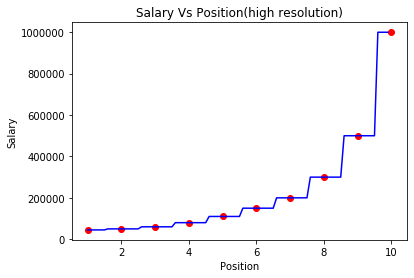

In [8]:
## Decision Tree will not perform well for Single feature(2D). it is usefull for mulidimensional data(many feature with target)
## We can perform visualisation in this case as it's 2D data
X_grid = np.arange(min(X) ,max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid),1)) 
plt.scatter(X,Y,color='Red')
plt.plot(X_grid, regressor.predict(X_grid),color='Blue')
plt.title('Salary Vs Position(high resolution)')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()                       